# Model Comparison

In [1]:
import numpy as np
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tabulate import tabulate
from PIL import Image
from Model_comparison_functions import *

Set path:


In [2]:
desktop_path = os.path.expanduser("~/Desktop")
#os.chdir(desktop_path+'\DTU MSc\MSc thesis\git\lightenup')
os.chdir(desktop_path+'\Thesis')
Add_on_path = "\\Results\\Different forecasts\\"
current_directory = os.getcwd()  # Jupyter file take the current directory as where the jupyter file is located. Different than a .py file...

In [3]:
df_Exp_Profit = json_to_df(current_directory + Add_on_path +  'Exp_profit.json')
df_RT_Profit = json_to_df(current_directory + Add_on_path + 'RT_profit.json')

In [4]:
Array = Create_Array_from_Profit(df_Exp_Profit,df_RT_Profit,NumForecasts=4, SampleSizes=[5])

In [5]:
Array_percent = np.mean(Array,axis=2)

In [6]:
print(np.shape(Array_percent))

(4, 1, 5, 2, 1)


[0, 1, 2, 3]
[-0.38, -0.18, 0.04000000000000002, 0.24000000000000005]


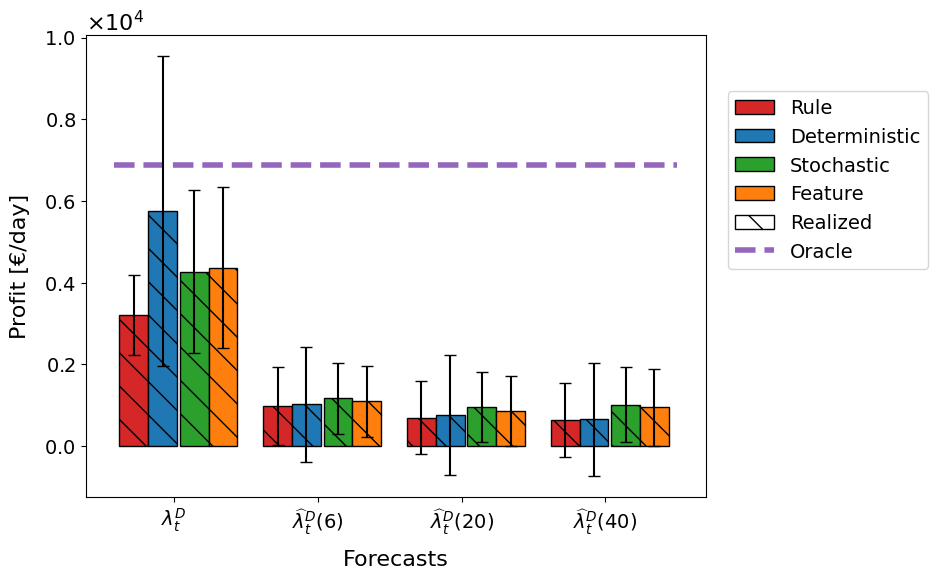

In [7]:
x_axis_tick_label = ["$\lambda_{t}^{D}$","$\widehat{\lambda}_{t}^{D}(5)$","$\widehat{\lambda}_{t}^{D}(20)$","$\widehat{\lambda}_{t}^{D}(40)$"]
x_axis_selection = [i for i in range(0,len(x_axis_tick_label))] # SampleSize[SampleSize_examination_idx] = 5
print(x_axis_selection)

plot_profit_Test(Array,PlotCase = "Forecasts", x_axis_label = "Forecasts", x_axis_selection = x_axis_selection, x_axis_tick_label = x_axis_tick_label, Selected_Profit = ['Realized'], barwidth = 0.2, pdf_name = 'Profit_Bar_different_forecast_plot',ShowEachTestDay = False,save = True)

# Always accepted

In [8]:
desktop_path = os.path.expanduser("~/Desktop")
#os.chdir(desktop_path+'\DTU MSc\MSc thesis\git\lightenup')
os.chdir(desktop_path+'\Thesis')
Add_on_path = "\\Results\\Different forecasts\\100 Acceptance\\"
current_directory = os.getcwd()  # Jupyter file take the current directory as where the jupyter file is located. Different than a .py file...

In [9]:
df_Exp_Profit = json_to_df(current_directory + Add_on_path +  'Exp_profit.json')
df_RT_Profit = json_to_df(current_directory + Add_on_path + 'RT_profit.json')
Array = Create_Array_from_Profit(df_Exp_Profit,df_RT_Profit,NumForecasts=4, SampleSizes=[5])

In [10]:
Array_100 = np.mean(Array,axis=2)

[0, 1, 2, 3]
[-0.38, -0.18, 0.04000000000000002, 0.24000000000000005]


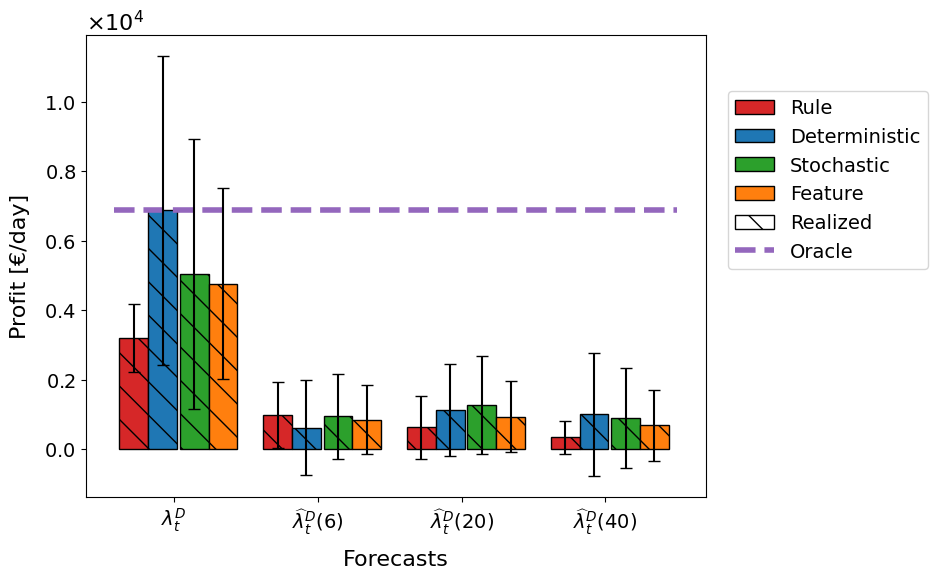

In [11]:
x_axis_tick_label = ["$\lambda_{t}^{D}$","$\widehat{\lambda}_{t}^{D}(5)$","$\widehat{\lambda}_{t}^{D}(20)$","$\widehat{\lambda}_{t}^{D}(40)$"]
x_axis_selection = [i for i in range(0,len(x_axis_tick_label))] # SampleSize[SampleSize_examination_idx] = 5
print(x_axis_selection)

plot_profit_Test(Array,PlotCase = "Forecasts", x_axis_label = "Forecasts", x_axis_selection = x_axis_selection, x_axis_tick_label = x_axis_tick_label, Selected_Profit = ['Realized'], barwidth = 0.2, pdf_name = 'Profit_bar_forecast',ShowEachTestDay = False,save = False)

### Table

In [12]:
np.shape(Array_percent)


(4, 1, 5, 2, 1)

In [13]:
Array_percent[0, 0, 0, 1, 0]

3214.0326197406243

In [14]:
$\lambda_{t}^{D}$, $\widehat{y}(V)$ & 3214 & 5753 & 4264 & 4369 \\
$\lambda_{t}^{D}$, $\widehat{y}(100\%)$ & 3214  & 6877 & 5050 & 4766\\
\hline
$\widehat{\lambda}_{t}^{D}(6)$, $\widehat{y}(V)$ & 987 & 1018 & 1167 & 1090  \\
$\widehat{\lambda}_{t}^{D}(6)$, $\widehat{y}(100\%)$ & 987 & 619 & 949 & 860 \\

SyntaxError: invalid syntax (580117771.py, line 1)

In [ ]:
lst = ["$\lambda_{t}^{D}$, $\widehat{y}(V)$","$\lambda_{t}^{D}$, $\widehat{y}(100\%)$","$\widehat{\lambda}_{t}^{D}(6)$, $\widehat{y}(V)$","$\widehat{\lambda}_{t}^{D}(6)$, $\widehat{y}(100\%)$"]
#result_summary = [ [[lst[j]] + int(Array_percent[j,0,i,1,0][0]) for i in range(0,4)] for j in range(0,4) ]

In [ ]:
2 % 2

0

In [ ]:
result_summary = [[lst[j]] + [int(Array_percent[j%2, 0, i, 1, 0]) if j<2  else int(Array_100[j%2, 0, i, 1, 0]) for i in range(0, 4)] for j in range(0, 4)]
print(result_summary)

[['$\\lambda_{t}^{D}$, $\\widehat{y}(V)$', 3214, 5753, 4264, 4369], ['$\\lambda_{t}^{D}$, $\\widehat{y}(100\\%)$', 987, 1018, 1167, 1090], ['$\\widehat{\\lambda}_{t}^{D}(6)$, $\\widehat{y}(V)$', 3214, 6877, 5050, 4766], ['$\\widehat{\\lambda}_{t}^{D}(6)$, $\\widehat{y}(100\\%)$', 987, 619, 949, 860]]


In [ ]:

result_summary = [[lst[j]] + [int(Array_percent[j, 0, i, 1, 0]) if j % 2 else int(Array_100[j-2, 0, i, 1, 0]) for i in range(0, 4)] for j in range(0, 4)]
print(result_summary)
headers = ["Rule", "Deterministic", "Stochastic", "Feature"]
table = tabulate(result_summary, headers, tablefmt="grid")
print(table)
# Generate LaTeX table code
table_code = "\\begin{table}[H]\n"
table_code += "\\centering\n"
table_code += "\\caption{Summary of Base case Results}\n"
table_code += "\\label{tab:base_case_results}\n"
table_code += "\\begin{tabular}{|" + "|".join(["l"] + ["c"] * (len(headers))) + "|}\n"
table_code += "\\hline\n"
table_code += " & " + " & ".join(headers) + " \\\\\n"
table_code += "\\hline\n"

for row in result_summary:
    table_code += " & ".join(str(item) for item in row) + " \\\\\n"

table_code += "\\hline\n"
table_code += "\\end{tabular}\n"
table_code += "\\end{table}"

print(table_code)


[['$\\lambda_{t}^{D}$, $\\widehat{y}(V)$', 643, 1138, 1267, 945], ['$\\lambda_{t}^{D}$, $\\widehat{y}(100\\%)$', 987, 1018, 1167, 1090], ['$\\widehat{\\lambda}_{t}^{D}(6)$, $\\widehat{y}(V)$', 3214, 6877, 5050, 4766], ['$\\widehat{\\lambda}_{t}^{D}(6)$, $\\widehat{y}(100\\%)$', 643, 654, 1010, 942]]
+------------------------------------------------------+--------+-----------------+--------------+-----------+
|                                                      |   Rule |   Deterministic |   Stochastic |   Feature |
+======================================================+========+=================+==============+===========+
| $\lambda_{t}^{D}$, $\widehat{y}(V)$                  |    643 |            1138 |         1267 |       945 |
+------------------------------------------------------+--------+-----------------+--------------+-----------+
| $\lambda_{t}^{D}$, $\widehat{y}(100\%)$              |    987 |            1018 |         1167 |      1090 |
+--------------------------------